# 1a

In [236]:
import numpy as np
import matplotlib.pyplot as plt


Some helper functions.

In [237]:
def generateRandomPoint(width, height):
    '''Helper function to (uniformly) generate a random point within a square of a given width and height.'''
    return (np.random.uniform(0, width), np.random.uniform(0, height))

def generateRandomPointInCircle(R):
    '''Generate a random point within a circle of radius R centered at the origin.'''
    theta = np.random.uniform(0, 2 * np.pi)
    r = R * np.sqrt(np.random.uniform(0, 1))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x, y)

def distance(x1, y1, x2, y2):
        '''Gets the (Euclidean) distance between (x1, y1) and (x2, y2).'''
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

Let's make a Tree class to represent the trees in the forest.

In [ ]:
class Tree:
    '''A Tree in the Sherwood Forest.'''
    def setDiameter(self, D):
        '''Sets diameter of self to D.'''
        self.diameter = D
        
    def setPosition(self, x, y):
        '''Sets position of self to (x,y).'''
        self.x_pos = x
        self.y_pos = y

If the forest is big enough, it is impossible to tell whether you are at the center or not just by looking around. This means we can assume that Robin Hood is at the center, so we simply place him at the origin and generate a circular forest around him, making sure not to place trees at the origin.  

In fact, for the sake of realism, let's give Robin some space and say that he is at least one meter from any trees.

In [ ]:
# We use the values from Ryden and R=10 as our default values
def generateForest(sigma=0.005, R=10, D=2):
    '''
    Generates a 2d forest of Trees placed randomly in a circle centered on the origin. Also

    Parameters:
    sigma (positive float): The density of the trees pr. unit area
    R (positive float): The radius of the circle within which the forest will be generated
    D (positive float): The diameter of the trees in the forest
    
    Returns a list of Trees with their positions set.
    '''
    # Calculate area and number of trees to place
    area = np.pi*R**2
    n_Trees = int(sigma*area)

    forest = []

    while len(forest) < n_Trees:
        # Generate a random point in the circle
        x, y = generateRandomPointInCircle(R)

        new_tree = Tree()
        new_tree.setDiameter(D)
        new_tree.setPosition(x, y)

        # Check if the new Tree touches any existing trees before appending it to the forest
        # We also make sure not to place any trees at the origin
        # all() returns True iff all elements of a list are True
        if all(distance(x, y, tree.x_pos, tree.y_pos) >= D for tree in forest) and distance(x, y, 0, 0) >= 1:
            forest.append(new_tree)
            # print(f"Placed Tree number {len(forest)} at position ({round(x)}, {round(y)})")
            

        
    return forest
        



It would be nice to have a plot of the forest, so let's add that.

Placed Tree number 1 at position (10, 85)
Placed Tree number 2 at position (-58, 56)
Placed Tree number 3 at position (60, 9)
Placed Tree number 4 at position (-12, -72)
Placed Tree number 5 at position (45, 17)
Placed Tree number 6 at position (51, -11)
Placed Tree number 7 at position (12, 55)
Placed Tree number 8 at position (61, -51)
Placed Tree number 9 at position (50, 48)
Placed Tree number 10 at position (91, -24)
Placed Tree number 11 at position (-42, -45)
Placed Tree number 12 at position (1, -19)
Placed Tree number 13 at position (-73, -18)
Placed Tree number 14 at position (18, -83)
Placed Tree number 15 at position (-5, 75)
Placed Tree number 16 at position (74, 47)
Placed Tree number 17 at position (-34, -82)
Placed Tree number 18 at position (-31, 24)
Placed Tree number 19 at position (-77, 9)
Placed Tree number 20 at position (-41, -58)
Placed Tree number 21 at position (26, -33)
Placed Tree number 22 at position (78, 16)
Placed Tree number 23 at position (-80, 50)
Pla

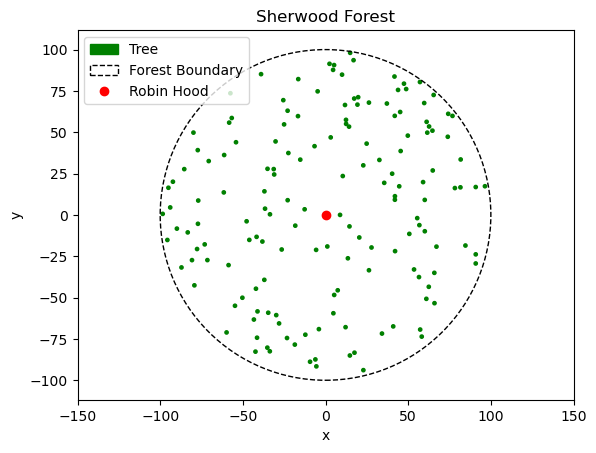

In [240]:
def plotForest(sigma=0.005, R=10, D=2):
    '''
    Plots a forest of Trees.
    
    Takes in the same parameters as generateForest().
    '''
    forest = generateForest(sigma, R, D)
    # Used to avoid setting a label for each Tree
    label_has_been_set = False

    # This adds each tree to the forest
    for tree in forest:
        if label_has_been_set:
            circle = plt.Circle((tree.x_pos, tree.y_pos), tree.diameter/2, color='green', fill=True)
        else:
            circle = plt.Circle((tree.x_pos, tree.y_pos), tree.diameter/2, color='green', fill=True, label='Tree')
            label_has_been_set = True
        plt.gca().add_artist(circle)

    # Draws boundary around the forest    
    circle = plt.Circle((0, 0), R, color='black', fill=False, linestyle='dashed', label='Forest Boundary')
    plt.gca().add_artist(circle)

    # Draws a dot at the origin
    plt.plot(0, 0, 'ro', label='Robin Hood')

    # Makes sure the axes are scaled the same, so the plot doesn't become 'squished'
    plt.axis('equal')
    # Sets appropriate x and y limits to make the whole forest visible
    plt.xlim(-1.5*R, 1.5*R)
    plt.ylim(-1.5*R, 1.5*R)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sherwood Forest')
    plt.legend()
    plt.show()

plotForest(0.005, 100, 2)